In [18]:
from __future__ import division, print_function , unicode_literals

# Commmon Imports
import numpy as np
import pandas as pd
import os

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", 
                            CHAPTER_ID, fig_id)
def save_fig(fig_id, tight_layout = True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id),format = 'png', dpi = 300)
    

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:] # petal length and petal width
y = iris.target

pd.DataFrame(np.c_[X,y]).sample(frac = 5/100,
                                random_state = 42)

,0,1,2
73,4.7,1.2,1.0
18,1.7,0.3,0.0
118,6.9,2.3,2.0
78,4.5,1.5,1.0
76,4.8,1.4,1.0
31,1.5,0.4,0.0
64,3.6,1.3,1.0
141,5.1,2.3,2.0


In [3]:
tree_clf = DecisionTreeClassifier(max_depth = 2, 
                                 random_state = 42)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

- You can visualize the trainined Decision Tree by first using the `export_graphviz()` method to output a graph definition file called _iris_tree.dot_: 

In [4]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, 
                out_file = image_path("iris_tree.dot"),
               feature_names = iris.feature_names[2:],
               class_names = iris.target_names,
               rounded = True,
               filled = True)

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
# Proving that all the setosa flowers have petal length 
# less than or equal to 2.45
np.sum(X[:,0][y==0] <= 2.45)

50

In [8]:
# Proving there is no setosa with petal length greater than
# 2.45
np.sum(X[:,0][y==0] > 2.45)

0

In [9]:
# Proving there are 100 flowers with petal length greater than
# 2.45
np.sum(X[:,0][y!=0] > 2.45)

100

In [10]:
# Proving that most of the Versicolor (49/50) flowers have
# petal width <= 1.75. 
np.sum(X[:,1][y==1] <= 1.75)

49

In [11]:
# Proving that 5 of the Iris Virginica (5/50) flowers 
# have petal width < 1.75
np.sum(X[:,1][y==2] < 1.75)

5

In [12]:
# Proving that one of the Versicolor (1/50) flowers have
# petal width > 1.75. 
np.sum(X[:,1][y==1] > 1.75)

1

In [13]:
# Proving that most of the Iris Virginica (45/50) flowers 
# have petal width > 1.75
np.sum(X[:,1][y==2] > 1.75)

45

<img src = "images/decision_trees/Decision_Tree_Visualised.png"> 

### Making Predictions: 

- Let's see how the tree represented makes predictions. 
- Suppose you find an iris flower and you want to classifiy it. 
- You start at the _root node_ (_Depth = 0_). 
    - This node asks whther the flower petal's length is smaller than or equal to 2.45. 
        - If Yes, then you move down to the root's left child node (_Depth = 1, left_). In this case, this node is a _leaf node_, which does not have any children. This means that it does not ask any further questions. You can simply look at the predicted class for that node and the Decision Tree predicts that your flower is an Iris-Setosa. (`class = setosa`) 
        - If No, (Petal Length > 2.45). You move down to the root's right child node (_Depth = 1_), right. In this case this node is not a leaf node. So it asks another question: 
        - Is the petal width <= 1.75cm? 
            - If it is, then your flower is most likely an Iris-Versicolor (_depth = 2_, left).
            - If not, the your flower is liekly an Iris-Virginica (_depth = 2_, right). 
            - It's really that simple. 
            

__Note:__ one of the many qualities of Decision Trees is that they require very little data preperation. 
In particular, they do not require feature scaling or centering at all. 


- A node's `samples` attribute counts how many training instances it applies to. 
    - For example, 100 training instances have a petal length greater than 2.45 cm (_depth = 1_, right), amoing which 54 have a petal width smaller than 1.75(_depth2, left).   
    
- A node's `value` attribute tells you how many instance of each class this node applies to. Basically tells you the distibution of the samples in each class (for that particular condition). 
    - For examples, the bottom right(_petal width > 1.75_) node applies to :
        - 0 Iris Setosa
        - 1 Iris Versicolor (See above code)
        - 45 Iris Verginica (See above code) 
- A node's `gini` attribute measures its _impurity_: a node is "pure"(gini = 0) if all the training instance it applies to(True/False for) belong to the same class. 
    - For example, since the _depth = 1_, left node applies to only the Iris-Setosa training instances, it is _pure_ and it's `gini` score is 0. 
    - # $G_i = 1 - \sum_{k=1}^n p_{i,k}^2$
    - where $p_{i,k}$ is the ratio of class _k_ instances among the training instances in the $i^th$ node. 
    - Another examples would be the _depth = 2_ node, which has a `gini` score = $ 1 - (0/54)^2 - (49/54)^2 - (5/54)^2 \approx 0.168 $ 
   
__Note:__ Scikit-Learning uses the CART algorithm, which produces _binary trees_: This means that _non-leaf_ nodes always have two children (i.e questions only have yes/no answers). However, other algorithms such as ID3 can produce Decision Trees with nodes that  hvae more than 2 children. 


In [14]:
X[:,0].min(), X[:,0].max(), X[:,1].min(), X[:,1].max()

(1.0, 6.9000000000000004, 0.10000000000000001, 2.5)

In [15]:
axes = [1,7.5, 0, 3]
x1s = np.linspace(axes[0],axes[1],5)
# 100 sample values for petal length 

x2s = np.linspace(axes[2], axes[3], 5)
# 100 sample values for petal width

x1, x2 = np.meshgrid(x1s, x2s)
# x1 = Makes 100 by 100 array with each row = x1s
# x2 = 100 by 100 array with each row = x2s
print(x1s)
print(x2s)
print(pd.DataFrame(np.c_[x1,x2]))
pd.DataFrame(np.c_[x1.ravel(), x2.ravel()])

[ 1.     2.625  4.25   5.875  7.5  ]
[ 0.    0.75  1.5   2.25  3.  ]
     0      1     2      3    4     5     6     7     8     9
0  1.0  2.625  4.25  5.875  7.5  0.00  0.00  0.00  0.00  0.00
1  1.0  2.625  4.25  5.875  7.5  0.75  0.75  0.75  0.75  0.75
2  1.0  2.625  4.25  5.875  7.5  1.50  1.50  1.50  1.50  1.50
3  1.0  2.625  4.25  5.875  7.5  2.25  2.25  2.25  2.25  2.25
4  1.0  2.625  4.25  5.875  7.5  3.00  3.00  3.00  3.00  3.00


,0,1
0,1.000,0.00
1,2.625,0.00
2,4.250,0.00
3,5.875,0.00
4,7.500,0.00
5,1.000,0.75
6,2.625,0.75
7,4.250,0.75
8,5.875,0.75
9,7.500,0.75


In [16]:
from matplotlib.colors import ListedColormap

axes=[0, 7.5, 0, 3]
iris=True
legend=False
plot_training=True

x1s = np.linspace(axes[0],axes[1],100)
# 100 sample values for petal length 

x2s = np.linspace(axes[2], axes[3], 100)
# 100 sample values for petal width

x1, x2 = np.meshgrid(x1s, x2s)
# x1 = Makes 100 by 100 array with each row = x1s
# x2 = 100 by 100 array with each column = x2s

In [17]:
X_new = np.c_[x1.ravel(), x2.ravel()]
# (10,000,2) input array with each possible petal length
# matched with each possible petal width, making sure
# we cover the whole possible sample area. 

# Proving that each row has a unique combination of 
# petal length, petal width: 
(pd.DataFrame(X_new) == pd.DataFrame(X_new).drop_duplicates()).all()

pd.DataFrame(X_new).sample(frac = 3/10000, random_state = 42)


,0,1
6252,3.939394,1.878788
4684,6.363636,1.393939
1731,2.348485,0.515152


In [18]:
y_pred = tree_clf.predict(X_new)
# (10000, ) reshaped to a 100,100 array
# In this array, the first row has predictions for the 
# first 100 unique combination of petal length and petal
# width. Then, from the second row, the row is repeated
# 99 more times. 

setosa = pd.DataFrame(np.c_[X_new[X_new[:,0] <= 2.45], y_pred[X_new[:,0]<= 2.45]]).sample(frac = 1/2400, random_state = 42)

versicolor = pd.DataFrame(np.c_[X_new[X_new[:,1]<= 1.75], y_pred[X_new[:,1]<= 1.75]]).sample(random_state = 12)

virginica = pd.DataFrame(np.c_[X_new[X_new[:,1] > 1.75], y_pred[X_new[:,1] > 1.75]]).sample(random_state = 30)

setosa.append([versicolor,virginica])


,0,1,2
52,1.439394,0.030303,0.0
62,4.696970,0.000000,1.0
1386,6.515152,2.151515,2.0


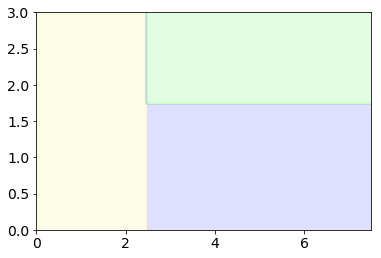

In [19]:
y_pred = y_pred.reshape(x1.shape)

custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
# if not iris:
#     custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
#     plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)

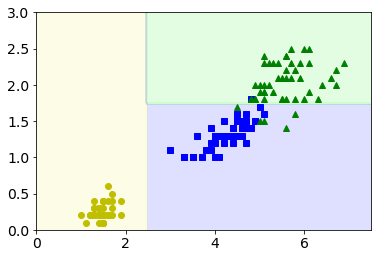

In [20]:
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
if not iris:
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
if plot_training:
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
    plt.axis(axes)


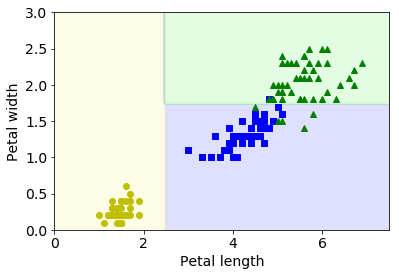

In [21]:
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
if not iris:
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
if plot_training:
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
    plt.axis(axes)
if iris:
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
else:
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
if legend:
    plt.legend(loc="lower right", fontsize=14)

Saving figure decision_tree_decision_boundaries_plot


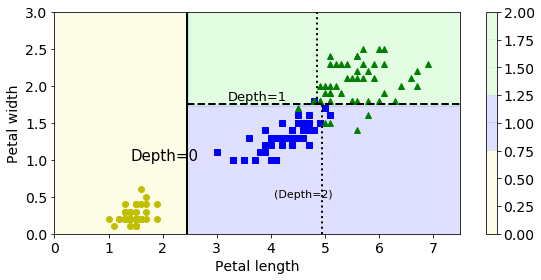

In [22]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.colorbar()

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

The above figure shows this Decision Tree's decision boundaries. 
The thick vertical line represents the decision boundaries  of the root_node _(depth = 0)_: petal length = 2.45.
Since the left area is pure(only Iris Setosa), it cannot be split further. 

However, the right area is impure, so the depth-1 right node splits it at petal width = 1.75 cm(represented by the dashed horizontal line). 

Since the `max_depth = 2`, the decision tree stops right there. However, if the `max_depth = 3`, then the two depth-2 nodes would each add another decision boundary which is represented by the (vertical dashed line). 



__Model Interpretation: White Box versus Black Box__ 
- As you can see, Decision Trees are fairly intuitive and their decisions are easy to interpret. 
- Such models are called __white box models__. 
- In contrat, as we will see: _Random Forest_ and _neural networks_ are __black box models__.
- They make great predictions, and you easily check the calculations that they perfomred to make these predicitons, never the less it is usually hard to explain in simple terms why the predictions were made. 
- For examples, if a neural network says that a particular person appears on a pictuyre, it is hard to know what actually contributed to this predicitons. 
    - Did the model recognize the persons' eyes?
    - Her mouth? 
    - Her nose? 
    - Her shoes? 
- Conversely, Decision Trees provide simple classification rules that can be applied manually if need be. 

## Prediciting classes and class probabilities: 

- A Decision Tree can also estimate the probability that an instance belongs to a particular class k: first it transverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class k in this node. 
<img src = "images/decision_trees/Decision_Tree_Visualised.png"> 
- For example: 
    - Suppose you have a flower whose petals are 5cm long and 1.5 cm wide. 
    - The corresponding lead node is the depth-2 left node, so the Decision Tree should output the following probabilities: 
        - $0%$ Iris Setosa $(0/54)$
        - $90.7%$ for Iris Versicolor $49/54$  
        - $9.3%$ for Iris Virginica $5/54$
   - And ofcourse, if you ask it to predict the class, it should output Iris-Versicolor (Class 1) since it has the highest probability. 

In [23]:
tree_clf.predict([[5, 1.5]])

array([1])

In [24]:
tree_clf.predict_proba([[5, 1.5]])

array([[ 0.        ,  0.90740741,  0.09259259]])

### The CART Training Algorithm: 

- Scikit-Learn uses the _Classification and Regression Tree_ Algorithm for trainining Decision Trees (also called "growing trees"). 
- Quite simple, the algorithm first splits the training set in two subsets using a single feature _k_ and a threshold $t_k$ (__`petal_length <= 2.45cm`__). 
- __Q. How does it choose $k$ and $t_k$?__
    - It searches for the pair ($k, t_k$) that produces the purest subsets (weighted by their size). 
- The cost function that the algorithm tries to minimise is given by:
    - # $J(k, t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$
    - ### $G_{left / right}$ measure the impurity of the $left / right $ subset. 
    - ### $m_{left/right}$ is the number of instances in the $left /right$ subset.  

- Once it has succefully split the training set in two, it split the subsets using the same logic then the subsets, and so on, recursively. 
- It stops recursing once it reached the maximum depth (defined by the max_depth hyperparameters) , or if it cannot find a split that will reduce impurity. 
- A few other hperparameters control additional stopping conditions. (explained below) 
    - `min_samples_split`: minimum number of samples a node must have before it is split. 
    - `min_samples_leaf`: minimum number of samples a leaf node must have. #DOUBT
    - `min_weight_fraction_leaf`: same as`min_samples_leaf` but expressed as a fraction of the total number of weighted instances. 
    - `max_leaf_nodes`: maximum number of leaf nodes 
    - `max_features`: maximum number of features that are evaluated for splitting at each node. 
- As you can see, the CART algorithm is a _greedy_ algorithm. It greedily searched for an optimum feature($k$) and threshold ($t_k$) combination that gives the least impurity(mixed up batches) on each side. 
- Then it repeats the process at each level. 
- It does not check whether or not the split will lead to the lowest possible impurity several levels down. 
- A greedy algorithm often produces a food solution, but it is not guaranteeed to be the optimal solution. 
- Unfortunately, finding the optimal tree is known to be an `NP-Complete problem`. #DOUBT
- It requires a $O(exp(m))$ time, making the problem intractable (hard to control or deal with) even for fairly small training sets. 
- This is why we must settle for a "reasonably good" solution. 

## Computational Complexity: 

__Prediction Complexity__: 
- Makinf predictions requires transversing the Decision Tree from the root to a leaf(no children, meaning sure of class). 
- Decision Trees are generally approximately balances, so transversing the Decision Trees requires roughly $O(log_2(m))$ nodes. 
- This means that if there are m instances. In the worst case scenario, your answer would be at the last leaf. Right? Therefore, the number of leafes that you will need to transverse is $log_2(m)$. 
- Since each node only requires checking the value of one feature, the overall prediction complexity is the same as the max number of nodes needed: $O(log_2(m))$, _independent of the number of features_ . 

- For example, draw a decision tree for $X = [1,2,3,4,5,6,7,8]$ in order to decide which number i have. 
    - In the worst case, you will need to ask 3 questions / transverse 3 nodes = $log_2(8)$. 
- Therefore, predictions are very fast, even when dealing with large training sets ( m is large ). 

__Training Complexity__ 
- However, the training algorithm compares all features (or less if `max_features` is set):
    - on all the samples (`!= number of training examples`, except for the first node)
    - on each node
    - in order to determine the best feature that returns the purest subsets. 
- This results in a training complexity of $O(n \times mlog(m)). $
- For a small training set (less than a few thousand instances), Scikit-Learn can speed up the training by presorting the data (`presort = True`), but this does slow down the training for larget instances. 

    

## Gini Impurity  or Entropy? 

- By default, `gini` impurtity measure is used but you can select the _entropy_ impurity measure instead by setting the `criterion` hyperparameter to `"entropy"`. 
- The concept of entropy originated in thermodynamics as a measure of molecular disorder: 
    - Entropy approaches 0 when molecues are still and well ordered (pure). 
    - Entropy approches 1 as molecules get more and more disordered. 
- Formula for Entorpy of $i^th$ node: 
    - # $ H_i = - \sum_{k=1}^n p_{i,k}log(p_{i,k})$
    - where p_{i,k} is not equal to 0. 

<img src = "images/decision_trees/Decision_Tree_Visualised.png"> 

- Entropy in Depth 1: 
    - $ 3 \times (- 50/150 log(50/150)) = 0.477$
- Entropy in Depth 2, left: 
    - $ (- 50/50 log(50/50)) = 0$
- Entropy in Depth 2, right:
    - $ (- 50/100 log(50/100) - (50/100)log(50/100) = 0.31$
- Entropy in Depth 3, left:
    - $ (- 49/54 log(40/54) - (5/54)log(5/54) = 0.13$
    
- __[So should you use Entropy or Ginni](https://sebastianraschka.com/faq/docs/decision-tree-binary.html)?__
    - Ginni is slightly faster to compute, ofcourse. So it is a good default. 
    - When they do differe, Gini impurtiy tends to isolate the most frequent class in its own branch of the tree, while entropy produices slightly more balanced trees. 
    
    

### Regularization Hyperaprameters: 

- Decision Trees make very few assumptions abou the training data (as opposed to linear models, which obviously assume that the data is linear, for example). 
- If left uncontrained, the tree structure will adapt itself to the training data, fitting it very closely and most likely overfitting it. 
- Such a model is called a _non parametric model_. 
    - Not because it does not have any parameters (it often has a lot) but because the number of parameters is not dfetermined prior to training, so the model structure is free to stick closely to the data. 
    - In contrast, a _parametric_ model such as a linear model has predetermined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting (but increasing the risk of underfitting). 
- To avoid overfitting the training data, you need to restrict the Decision Tree's freedom during training. 
    - For example, reducing `max_depth` will regularize the model and thuse reduce the risk of overfitting. 
- A few other hperparameters control additional stopping conditions. (explained below) 
    - `min_samples_split`: minimum number of samples a node must have before it is split. 
    - `min_samples_leaf`: minimum number of samples a leaf node must have. #DOUBT
    - `min_weight_fraction_leaf`: same as`min_samples_leaf` but expressed as a fraction of the total number of weighted instances. 
    - `max_leaf_nodes`: maximum number of leaf nodes 
    - `max_features`: maximum number of features that are evaluated for splitting at each node.  
- Reducing the `max` hyperparameters and increasing the `min` hyperparameters regularizes the model. 

__Note:__ 
   - Other algorithms work first by training the Decision Tree without restrictions, then _prunning_ or deleting unnecessary nodes. 
   - A node whole children are all leaf nodes is considered unnecessary if the purity improvement it provides is not _statistically significant_. 
   - Standard statistical test, such as $\chi^2$ test are used to estimate the probability that the improvement is purely the result of chance (which is the null hypothesis). 
   - If this probability, called the _p-value_ is higher than a given threshold (typically 5%), then the node is considered unnecessary and its children are deleted. 
   - The prunning continues untill all unecessary nodes have been pruned. 
   - This means that if there is a almost pure node (which has most of the instances of 1 class only), and then it's further divided into subsets to create 2 leaf nodes (pure nodes). If the improvement in purity is minimal. Or If the improvement in purity is probably a result of chance, then the leaf nodes are prunned. 
   - The are prunned because it won't make a difference in the prediction. The class with the highest probability (given the instance) will not change between the last and second last node. 
   

In [33]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [34]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

In [35]:
from sklearn.tree import export_graphviz

export_graphviz(tree_reg, 
                out_file = image_path("moon_reg_tree.dot"),
               feature_names = ["Input"],
               class_names = ["Output"],
               rounded = True,
               filled = True)

<img src = "images/decision_trees/moon_tree_reg_visualised.png"> 


In [45]:
# Checking values closest to 0.6 in the training data
X[X <= 0.6][-1], X[X >= 0.6][0] 

(0.34920957461266089, 0.95071430640991617)

In [46]:
# Checking 0.35's real value
y[X == 0.34920957461266089]

array([-0.04979537])

In [48]:
# Checking 0.35's predicted value
tree_reg.predict([[0.34920957461266089]])

array([ 0.11063973])

In [49]:
# Calculating the squared error made by this one prediction
(-0.04979537 - 0.1106 )**2 

0.025726674717436903

__Reasoning out why $0.35$'s prediction was $0.1106$.__ 
- The tree looks very similar to the tree we saw ealier. - Just one main difference: 
    - Instead of predictng a class at each node, this one predicts a value. 
- For example: 
 
    - You want to make a prediction for a new instance $x_1 = 0.6$. 
    - Node 1: $0.35 <= 0.1973$? No, False (We go right down the tree) 
    - Node 2: $0.35 <= 0.7718$? Yes, True, (We move left down the tree) 
    - Node 3: Predicts $0.1106$ with an error of 0.026, which is pretty close to the `mse` given in that node, i.e $0.0151$. 
    - This value, $0.1106$ is the average target value of the 110 instances associated with this leaf node. 
    - This prediction results in a mean squared error of $0.0151$ over these 110 instances.  
    

In [50]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state = 42, 
                                  max_depth = 2)
tree_reg2 = DecisionTreeRegressor(random_state = 42, 
                                 max_depth = 3)
tree_reg1.fit(X,y)

# DecisionTreeRegressor(
#     criterion='mse', 
#     max_depth=2, 
#     max_features=None,
#     max_leaf_nodes=None,
#     min_impurity_split=1e-07,
#     min_samples_leaf=1,
#     min_samples_split=2,
#     min_weight_fraction_leaf=0.0,
#     presort=False,
#     random_state=42,
#     splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

In [51]:
tree_reg2.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

[-0.094477882876397606,
 1.0868869366005174,
 -0.24730892779942126,
 1.2439880361312807]

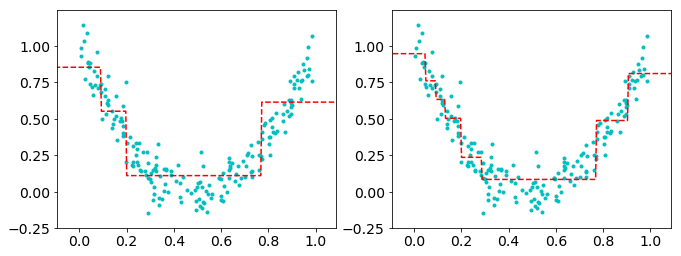

In [61]:
plt.figure(figsize=(11, 4))
plt.subplot(121)
# Plotting the data
plt.plot(X,y, "c.")

# 2d array needed for regression predictions
x1 = np.linspace(axes[0], axes[1], 500).reshape(-1,1)

# Prediction with depth = 2 
y_pred = tree_reg1.predict(x1)

# Plotting the predictions
plt.plot(x1, y_pred, "r--")
plt.axis([X.min() - 0.1, X.max() + 0.1, 
          y.min() - 0.1 , y.max() + 0.1])

plt.subplot(122)
# Plotting the data
plt.plot(X,y, "c.")

# Predictions with max_depth = 3
y_pred = tree_reg2.predict(x1)

# Plotting the predictions
plt.plot(x1, y_pred, "r--")
plt.axis([X.min() - 0.1, X.max() + 0.1, 
          y.min() - 0.1 , y.max() + 0.1])

The above shows the predictions made by a `DecisionTreeRegresor` with `max_depth = 2` on the left and `max_depth = 3` on the right. 
- __Notice how the predicted value for each region is always the average target value of the instances in that region.__
- __The algorithm splits each region in a way that makes most training instances as close as possible to that predicted value__. 

__ What if i increase the depth to the number of training instances / No Restrictions? __


In [69]:
deep_tree_reg = DecisionTreeRegressor(random_state = 42)
deep_tree_reg.fit(X,y)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

[-0.094477882876397606,
 1.0868869366005174,
 -0.24730892779942126,
 1.2439880361312807]

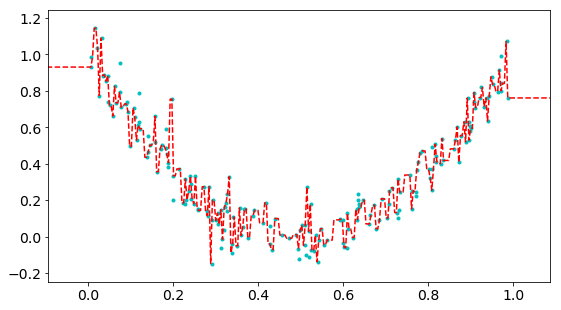

In [70]:
plt.figure(figsize = (9,5))
# Plotting the data
plt.plot(X,y, "c.")

# 2d array needed for regression predictions
x1 = np.linspace(axes[0], axes[1], 500).reshape(-1,1)

# Prediction with depth = 2 
y_pred = deep_tree_reg.predict(x1)

# Plotting the predictions
plt.plot(x1, y_pred, "r--")
plt.axis([X.min() - 0.1, X.max() + 0.1, 
          y.min() - 0.1 , y.max() + 0.1])

- __Notice how the predicted value for each region is always the average target value of the instances in that region.__
- __The algorithm splits each region in a way that makes most training instances as close as possible to that predicted value__. 
- The CART algorithm works mostly the same way as earlier, except that instead of trying to split the training set in way that _minimizes impurity on both subsets_ (left and right), it now tries to split the training set in way that minimizes the _MSE on both subsets_ (left and right). 
- This is the cost function which CART algorithm minimizes in case of Regression:  
- #  $ J(k, t_k) = \frac{m_{left}}{m}MSE_{left} + \frac{m_{right}}{m}MSE_{right}$
- ## where $MSE_{node} = \sum_{i}(\hat{y}_{node} - y^i)^2$
    - ### where $\hat{y}_{node} = \frac{1}{m_{node}}\sum_i y^i$

- Just like for the classifcation tasks, Decision Trees are prone to overfitting when dealing with regression tasks. 
- Withou any regularization (i.e using the default hyperpameters), you get the predictions on the left of the following image. 
- The right image shows a much more regularized and able to generalise model. 

In [73]:
regularized_deep_tree = DecisionTreeRegressor(
    random_state = 42, min_samples_leaf = 10)

regularized_deep_tree.fit(X,y)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

[-0.094477882876397606,
 1.0868869366005174,
 -0.24730892779942126,
 1.2439880361312807]

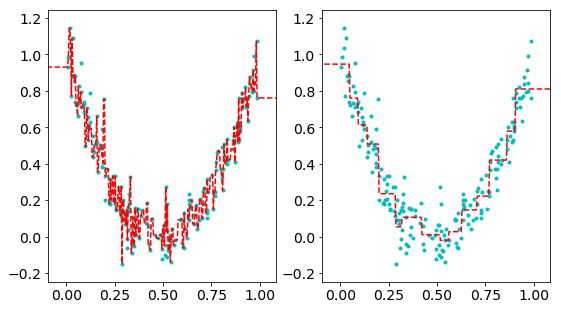

In [74]:
plt.figure(figsize = (9,5))
plt.subplot(121)
# Plotting the data
plt.plot(X,y, "c.")

# 2d array needed for regression predictions
x1 = np.linspace(axes[0], axes[1], 500).reshape(-1,1)

# Prediction with depth = 2 
y_pred = deep_tree_reg.predict(x1)

# Plotting the predictions
plt.plot(x1, y_pred, "r--")
plt.axis([X.min() - 0.1, X.max() + 0.1, 
          y.min() - 0.1 , y.max() + 0.1])

plt.subplot(122)
# Plotting the data
plt.plot(X,y, "c.")

# 2d array needed for regression predictions
x1 = np.linspace(axes[0], axes[1], 500).reshape(-1,1)

# Prediction with depth = 2 
y_pred = regularized_deep_tree.predict(x1)

# Plotting the predictions
plt.plot(x1, y_pred, "r--")
plt.axis([X.min() - 0.1, X.max() + 0.1, 
          y.min() - 0.1 , y.max() + 0.1])

In [80]:
from sklearn.tree import export_graphviz

export_graphviz(deep_tree_reg, 
                out_file = image_path("deep_moon_reg_tree.dot"),
               feature_names = ["Input"],
               class_names = ["Output"],
               rounded = True,
               filled = True)
# >> Goes beyond the screen, very huge, has 382 nodes. 

In [85]:
from sklearn.tree import export_graphviz

export_graphviz(regularized_deep_tree, 
                out_file = image_path("regularized_deep_moon_reg_tree.dot"),
               feature_names = ["Input"],
               class_names = ["Output"],
               rounded = True,
               filled = True)
# Fits right within the screen, too many nodes

In [20]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', 
#                      data_home = "/Users/rishabhchopra/Desktop/handson-ml-master/my_notebooks/datasets"
                    )
X, y = mnist["data"], mnist["target"]
X.shape
# >> (70000 , 784)
y.shape
# >> (70000,) 

(70000,)

In [21]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [36]:
from sklearn.tree import DecisionTreeClassifier

mnist_tree_clf = DecisionTreeClassifier(max_depth = 16,
                                        min_samples_split = 100,
                                       random_state = 42)
mnist_tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=100, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [37]:
mnist_tree_clf.score(X_train,y_train)

0.88319999999999999

In [38]:
mnist_tree_clf.score(X_test,y_test)
# Very bad

0.85240000000000005

In [35]:
from sklearn.tree import export_graphviz

feature_names = []
for i in range(0,784):
    feature_names.append('Pixel #'+str(i))

export_graphviz(mnist_tree_clf, 
                out_file = image_path("mnist_tree_clf_min_leaf5_min_samples100.dot"),
               feature_names = feature_names,
               class_names = ['0',"1",'2','3','4','5',
                              '6','7','8','9'],
               rounded = True,
               filled = True)

## Instability: 

- Hopefully by now you are convinced that Decision Trees have a lot going for them: they are simple to understand and interpret, easy to use, versatile, and powerful.  

- First, as you may have notices, Decision Trees love orthogonal decision boundaries (all splits are perpendiculat to an axis), which makes them sensitive to training set rotation.

- One way to limit this problem is to use PCA, which often results in a better orientation of the training data. 
- More generally, the main issue with Decision Trees is that they are very sensitive to small variations in the training data. 
- For example, 
    - if you just remove the widest Iris-Versicolor from the iris training set (the one with the petals 4.8cm and 1.8cm wide) and train a new Decision Tree, you may get a model that looks really different than the one seen before. 
- Another problem is that , since the training algorithm (CART) used by Scikit-Learn is stochastic (_it randomly selects the set of features to evaluate at each node_), you may get very different models, even on the same training data. 
- Random Forests can liumit this instability y averaging the predictions over many trees, as we will see. 

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'max_depth': [2, 5, 9, 13, 17],
    'min_samples_split':[10, 50, 100, 200, 400,],
    'min_samples_leaf':[10, 50, 100, 200, 400]
}]

grid_search = GridSearchCV(mnist_tree_clf, param_grid, cv = 3, 
                          scoring = "accuracy")
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'max_depth': 17, 'min_samples_leaf': 10, 'min_samples_split': 10}

In [44]:
from sklearn.tree import DecisionTreeClassifier

mnist_tree_clf = DecisionTreeClassifier(max_depth = 17,
                                        min_samples_split = 10,
                                        min_samples_leaf = 10,
                                       random_state = 42)
mnist_tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=17,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [45]:
mnist_tree_clf.score(X_train,y_train)

0.92164999999999997

In [46]:
mnist_tree_clf.score(X_test,y_test)
# Very bad

0.87690000000000001